<a href="https://colab.research.google.com/github/metamath1/noviceml/blob/master/CHAP_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2장 그림 및 예제 코드


In [1]:
# 기본적인 import들
# 이후 그래프 그리는 코드에는 중복으로 적지 않음.
# 다른 곳으로 그래프 그리는 코드를 복사-붙이기 할 때는 
# 이 import 코드와 함께 복사-붙이기 해야함
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [2]:
# 데이터 파일 사용을 위한 github repo 복사
# !주의! 
# 구글 colab 환경에서 실행하는 경우만 실행하세요.
# 로컬환경에서는 실행하지 마세요.
!git clone -l -s https://github.com/metamath1/noviceml.git noviceml

'noviceml'에 복제합니다...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 153 (delta 42), reused 53 (delta 16), pack-reused 48
오브젝트를 받는 중: 100% (153/153), 7.86 MiB | 15.47 MiB/s, 완료.
델타를 알아내는 중: 100% (59/59), 완료.


In [2]:
# 구글 colab 환경일 경우 그래프에 한글 폰트 사용을 위한 설정
path = './font/NanumBarunGothic.ttf'
fontprop = mfm.FontProperties(fname=path, size=18)

# 로컬 환경일 경우 그래프에 한글 폰트 사용을 위한 설정
# https://financedata.github.io/posts/matplotlib-hangul-for-ubuntu-linux.html
# 아래 코드의 주석 제거 후 경로를 유저 컴퓨터의 폰트 파일 경로로 수정하세요.
# path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# fontprop = mfm.FontProperties(fname=path, size=18)

In [3]:
def arrowed_spines(fig, ax, remove_ticks=False):
    """
    좌표축 화살표를 그리기 위한 함수
    https://stackoverflow.com/questions/33737736/matplotlib-axis-arrow-tip
    """
    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    if remove_ticks == True: 
        # removing the axis ticks
        plt.xticks([]) # labels 
        plt.yticks([])
        ax.xaxis.set_ticks_position('none') # tick markers
        ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./50.*(ymax-ymin) 
    hl = 1./25.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.4 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, #overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, #overhang = ohg, 
             length_includes_head= True, clip_on = False)

## 그림 2-3

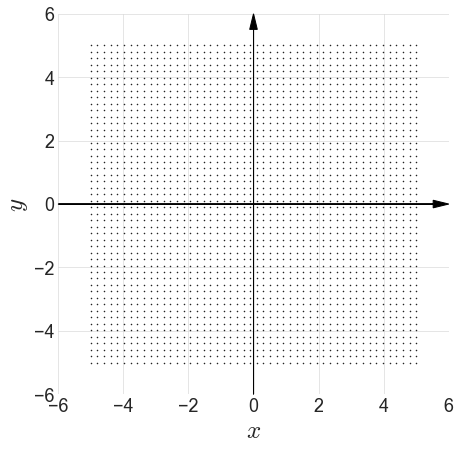

In [4]:
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)

ax.set_xlim(-6,6)
ax.set_ylim(-6,6)

x = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(x, x)

plt.plot(xx, yy, '.', markersize=1, color='k')

arrowed_spines(fig, ax)

if file_print == True :
    fig.savefig("imgs/chap2/fig2-3.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap2/fig2-3.pdf", format='pdf', bbox_inches='tight')

plt.show()

## 그림 2-4

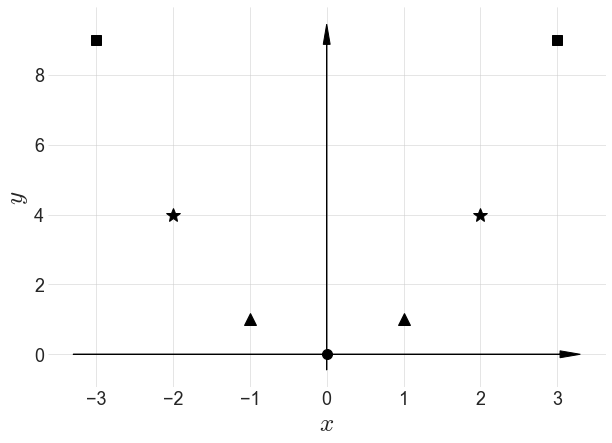

In [5]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)

plt.plot(0,  0, 'o', color='k', markersize=10)

plt.plot(1,  1, '^', color='k', markersize=9+3)
plt.plot(-1, 1, '^', color='k', markersize=9+3)

plt.plot(2,  4, '*', color='k', markersize=11+3)
plt.plot(-2, 4, '*', color='k', markersize=11+3)

plt.plot(3,  9, 's', color='k', markersize=7+3)
plt.plot(-3, 9, 's', color='k', markersize=7+3)
   
    
arrowed_spines(fig, ax)

if file_print == True :
    fig.savefig("imgs/chap2/fig2-4.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap2/fig2-4.pdf", format='pdf', bbox_inches='tight')

plt.show()

## 그림 2-5

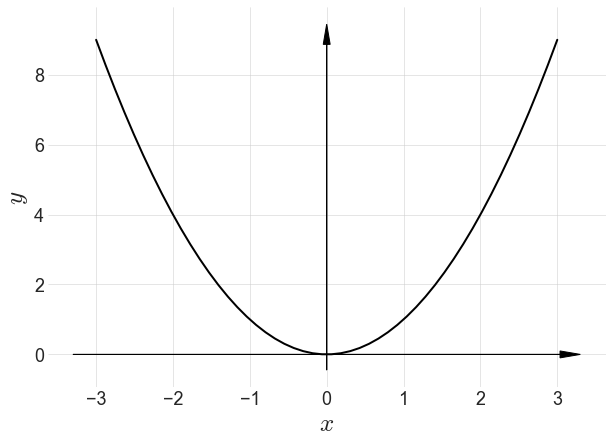

In [6]:
fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
#plt.axis('equal')

x = np.linspace(-3,3,50)

plt.plot(x, x**2, color='k')

arrowed_spines(fig, ax)

if file_print == True :
    fig.savefig("imgs/chap2/fig2-5.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap2/fig2-5.pdf", format='pdf', bbox_inches='tight')

plt.show()

## 그림 2-6

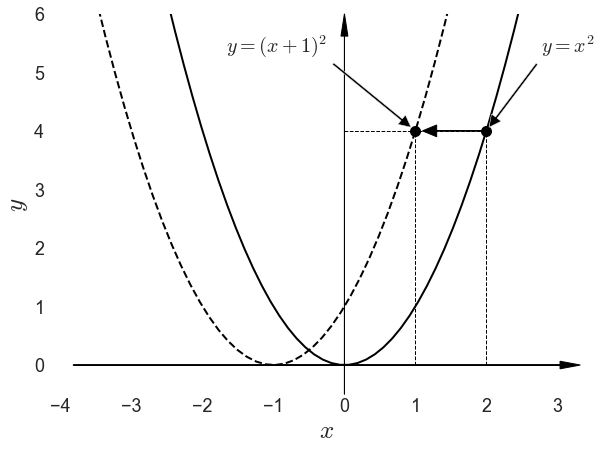

In [7]:
fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
# plt.axis('equal')
ax.grid(False)

x = np.linspace(-3,3,50)
x2 = np.linspace(-3.5,3,50)

plt.plot( (2,2), (0, 4), 'k--', lw=1 )
plt.plot( (1,1), (0, 4), 'k--', lw=1 )

plt.plot(x, x**2, color='k')
plt.plot(x2, (x2+1)**2, '--', color='k')
plt.plot( (0,2), (4, 4), '--', lw=1, color='k' )
plt.plot(2,  4, 'o', color='k', markersize=10)
plt.plot(1, 4, 'o',  color='k', markersize=10)

ax.annotate(r'$y=x^2$', fontsize=20,
            xy=(2, 4), xycoords='data',
            xytext=(0.98, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='k', shrink=0.05, width=2),
            horizontalalignment='right', verticalalignment='top')

ax.annotate(r'$y=(x+1)^2$', fontsize=20,
            xy=(1, 4), xycoords='data',
            xytext=(0.5, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='k', shrink=0.05, width=2),
            horizontalalignment='right', verticalalignment='top')

ax.arrow(2, 4, -0.7, 0, lw=1, head_width=0.2, head_length=0.2, fc='k', ec='k')


plt.ylim(-0.5, 6)

arrowed_spines(fig, ax)

if file_print == True :
    fig.savefig("imgs/chap2/fig2-6.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap2/fig2-6.pdf", format='pdf', bbox_inches='tight')

plt.show()

## 그림 2-7

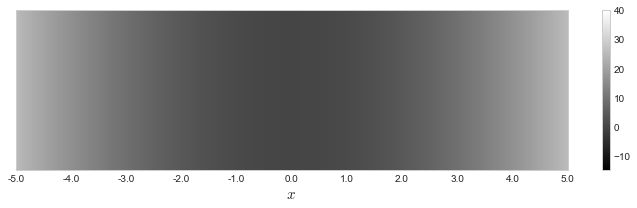

In [8]:
itv = 500
Y = np.linspace(-5, 5, itv).reshape(1, itv)**2

fig, ax = plt.subplots(1, 1)
fig.set_size_inches((10,3))

norm = mpl.colors.Normalize(vmin=np.min(Y)-15, vmax=np.max(Y)+15)
c = ax.pcolor(Y, cmap=mpl.cm.gray, norm=norm)

plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xticks(np.linspace(0, itv, 11), minor=False)
ax.set_xticklabels(np.linspace(-5, 5, 11))
plt.xlabel(r'$x$ ', fontsize=15)

fig.colorbar(c, ax=ax)
fig.tight_layout()

if file_print == True :
    fig.savefig("imgs/chap2/fig2-7.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap2/fig2-7.pdf", format='pdf', bbox_inches='tight')

plt.show()

## 그림 2-9

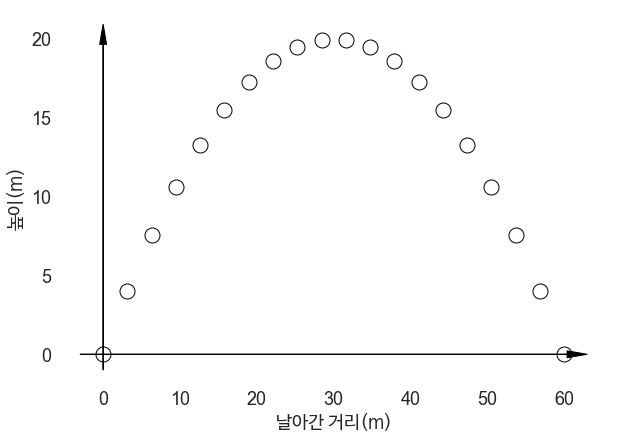

In [9]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((10,7))

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.grid(False)

x = np.linspace(0, 60, 20)
y = -(1/45)*x**2 + (4/3)*x

plt.plot(x, y, 'ko', markersize=15, fillstyle='none')
plt.xlabel('날아간 거리(m)', fontproperties=fontprop)
plt.ylabel('높이(m)', fontproperties=fontprop)
#plt.axis('equal')

arrowed_spines(fig, ax)

if file_print == True :
    fig.savefig("imgs/chap2/fig2-9.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap2/fig2-9.pdf", format='pdf', bbox_inches='tight')

plt.show()

## 그림 2-10

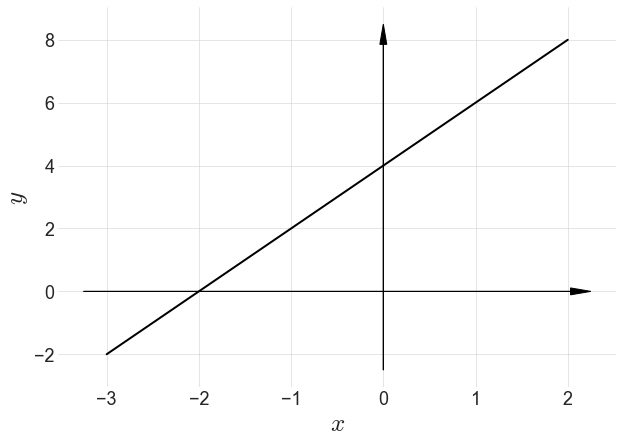

In [10]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)

x = np.linspace(-3, 2, 10)
y = 2*x+4
ax.plot(x, y, 'k')

arrowed_spines(fig, ax)

if file_print == True :
    fig.savefig("imgs/chap2/fig2-10.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap2/fig2-10.pdf", format='pdf', bbox_inches='tight')

plt.show()

## 그림 2-11

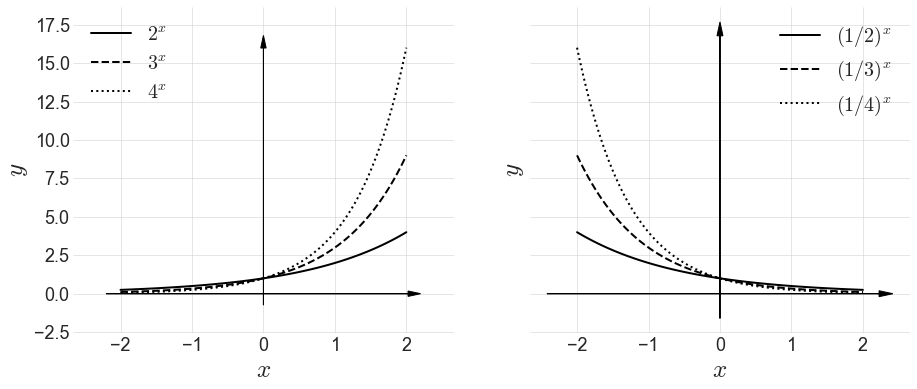

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)

x = np.linspace(-2, 2, 100)
a1, a2, a3 = 2, 3, 4
y1, y2, y3 = a1**x, a2**x, a3**x 

ax1.plot(x, y1, color='k', label=r"$2^x$")
ax1.plot(x, y2, '--', color='k', label=r"$3^x$")
ax1.plot(x, y3, ':', color='k', label=r"$4^x$")
    
ax1.set_xlabel('$x$', fontsize=25)
ax1.set_ylabel('$y$', fontsize=25)
ax1.legend(fontsize=20)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)

x = np.linspace(-2, 2, 100)
a1, a2, a3 = 1/2, 1/3, 1/4
y1, y2, y3 = a1**x, a2**x, a3**x 

ax2.plot(x, y1, color='k', label=r"$(1/2)^x$")
ax2.plot(x, y2, '--', color='k', label=r"$(1/3)^x$")
ax2.plot(x, y3, ':', color='k', label=r"$(1/4)^x$")
    
ax2.set_xlabel('$x$', fontsize=25)
ax2.set_ylabel('$y$', fontsize=25)
ax2.legend(fontsize=20)

arrowed_spines(fig, ax1)
arrowed_spines(fig, ax2)

if file_print == True :
    fig.savefig("imgs/chap2/fig2-11.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap2/fig2-11.pdf", format='pdf', bbox_inches='tight')

plt.show()

## 그림 2-12

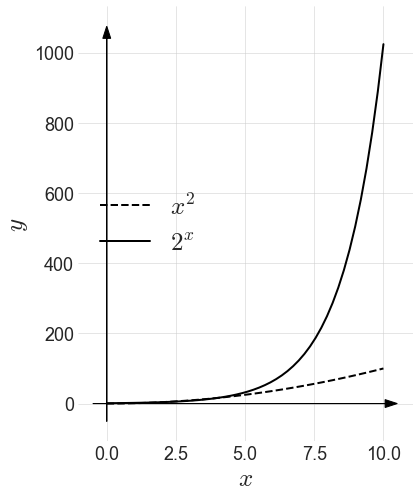

In [12]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((6,8))

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

x = np.linspace(0, 10)

y1 = x**2
y2 = 2**x

plt.plot(x, y1, '--', color='k', label=r"$x^2$")
plt.plot(x, y2, color='k', label=r"$2^x$")
    
plt.legend(loc="center left",fontsize=25)
plt.xlabel('$x$', fontsize=25)
plt.ylabel('$y$', fontsize=25)

arrowed_spines(fig, ax)

if file_print == True :
    fig.savefig("imgs/chap2/fig2-12.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap2/fig2-12.pdf", format='pdf', bbox_inches='tight')

plt.show()

## 그림 2-14

In [13]:
def log(x, base):
    return np.log(x)/np.log(base)

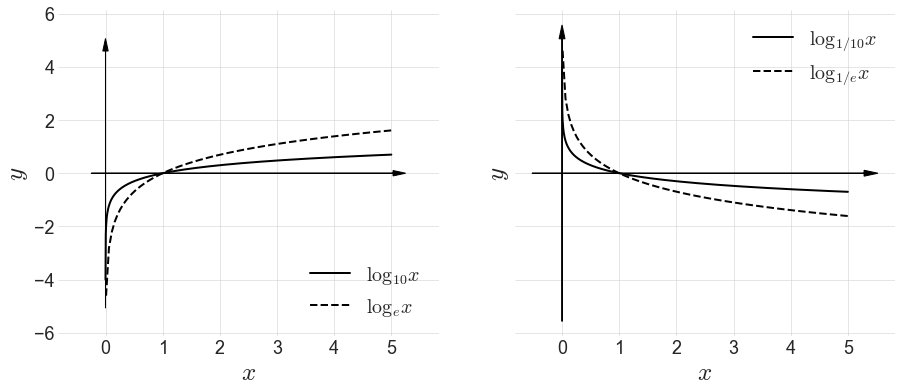

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)

x1 = np.linspace(0.0001, 5, 1000)
x2 = np.linspace(0.01, 5, 100)
y1, y2 = log(x1, 10), log(x2, np.e) 

ax1.plot(x1, y1, label=r"$\log_{10} x$", color='k')
ax1.plot(x2, y2, '--', label=r"$\log_{e} x$", color='k')

ax1.set_xlabel('$x$', fontsize=25)
ax1.set_ylabel('$y$', fontsize=25)
ax1.legend(fontsize=20, loc='lower right')

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)

x1 = np.linspace(0.0001, 5, 1000)
x2 = np.linspace(0.01, 5, 100)
y1, y2 = log(x1, 1/10), log(x2, 1/np.e) 

ax2.plot(x1, y1, label=r"$\log_{1/10} x$",  color='k')
ax2.plot(x2, y2, '--', label=r"$\log_{1/e} x$", color='k')
    
ax2.set_xlabel('$x$', fontsize=25)
ax2.set_ylabel('$y$', fontsize=25)
ax2.legend(fontsize=20, loc='upper right')

arrowed_spines(fig, ax1)
arrowed_spines(fig, ax2)

if file_print == True :
    fig.savefig("imgs/chap2/fig2-14.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap2/fig2-14.pdf", format='pdf', bbox_inches='tight')

plt.show()

## 그림 2-15

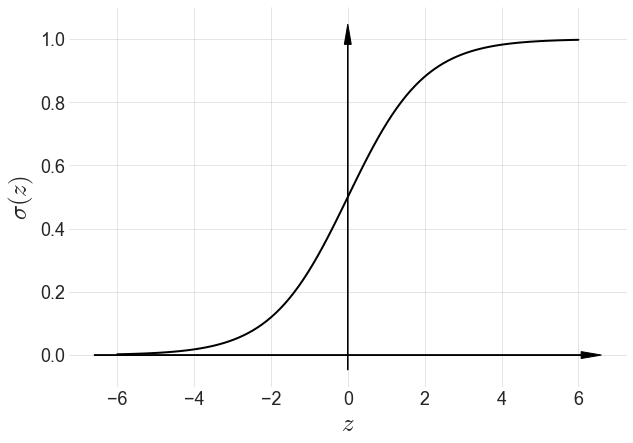

In [15]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

z = np.linspace(-6, 6, 100)
sigma = 1/(1+np.exp(-z))

ax.plot(z, sigma, color='k')
    
ax.set_xlabel('$z$', fontsize=25)
ax.set_ylabel(r'$\sigma(z)$', fontsize=25)

arrowed_spines(fig, ax)

if file_print == True :
    fig.savefig("imgs/chap2/fig2-15.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap2/fig2-15.pdf", format='pdf', bbox_inches='tight')

plt.show()